1.Import Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

2.Load Dataset

In [2]:
# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
df["species"] = df["species"].map({0:"setosa", 1:"versicolor", 2:"virginica"})

# Display first rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Dataset info
print(df.shape)
print(df["species"].value_counts())
df.describe()


(150, 5)
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3.Data Visualisation

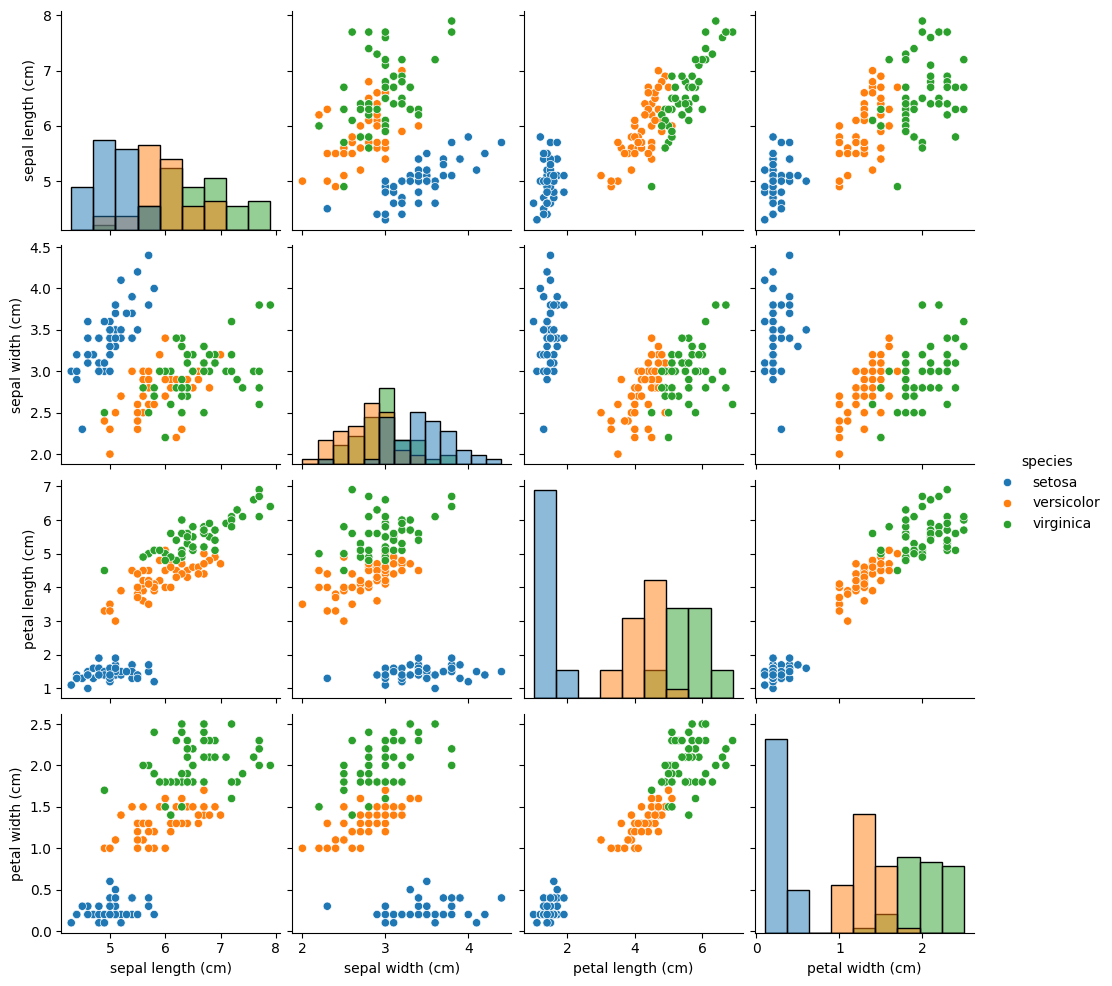

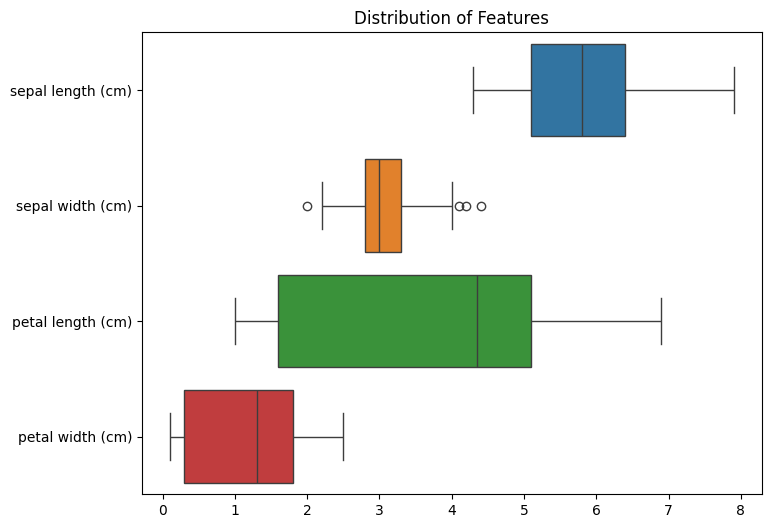

In [4]:
# Pairplot
sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, orient="h")
plt.title("Distribution of Features")
plt.show()


4.Test-Train Split

In [5]:
X = df.drop("species", axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


5.Model Training

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
    print(f"{name}: {score:.2f}")


Logistic Regression: 1.00
KNN (k=3): 1.00
Decision Tree: 1.00


6.Model Evaluation

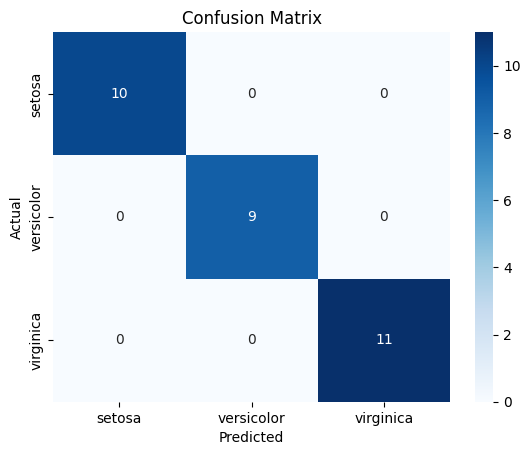

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# Pick the best model (Decision Tree here)
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
